📷 Default sample image created: sample.jpg
✅ sample.jpg resized to (300, 300) and saved as sample.png


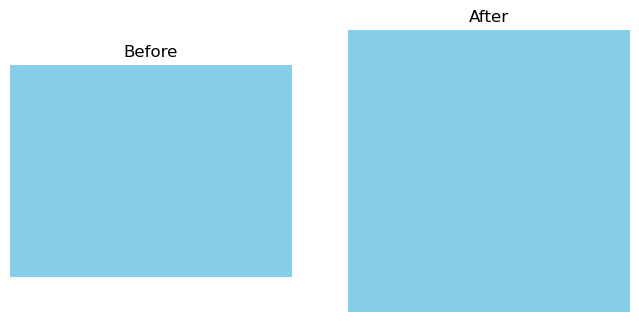

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
input_folder = "input_images"
output_folder = "output_images"
os.makedirs(input_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)
sample_path = os.path.join(input_folder, "sample.jpg")
if not os.path.exists(sample_path):
    img = Image.new("RGB", (800, 600), color="skyblue")
    img.save(sample_path)
    print(" Default sample image created: sample.jpg")
new_size = (300, 300)
valid_extensions = (".jpg", ".jpeg", ".png")
for filename in os.listdir(input_folder):
    if filename.lower().endswith(valid_extensions):
        try:
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path)

           
            img_resized = img.resize(new_size)

          
            new_filename = os.path.splitext(filename)[0] + ".png"
            img_resized.save(os.path.join(output_folder, new_filename))

            print(f" {filename} resized to {new_size} and saved as {new_filename}")

            
            fig, axes = plt.subplots(1, 2, figsize=(8, 4))
            axes[0].imshow(img)
            axes[0].set_title("Before")
            axes[0].axis("off")

            axes[1].imshow(img_resized)
            axes[1].set_title("After")
            axes[1].axis("off")

            plt.show()

        except Exception as e:
            print(f" Error processing {filename}: {e}")


Failed to download image https://images.pexels.com/photos/336172/pexels-photo-336172.jpeg: 404 Client Error: Not Found for url: https://images.pexels.com/photos/336172/pexels-photo-336172.jpeg
Downloaded dog2.jpg
Failed to download image https://upload.wikimedia.org/wikipedia/commons/0/06/Cute_dog.jpg: 403 Client Error: Forbidden. Please comply with the User-Agent policy: https://foundation.wikimedia.org/wiki/Special:MyLanguage/Policy:Wikimedia_Foundation_User-Agent_Policy for url: https://upload.wikimedia.org/wikipedia/commons/0/06/Cute_dog.jpg
Failed to download image https://eastgateanimalhospital.com/.../dog.jpg: 404 Client Error: Not Found for url: https://www.eastgateanimalhospital.com/.../dog.jpg
✅ dog2.jpg resized and saved as dog2.png


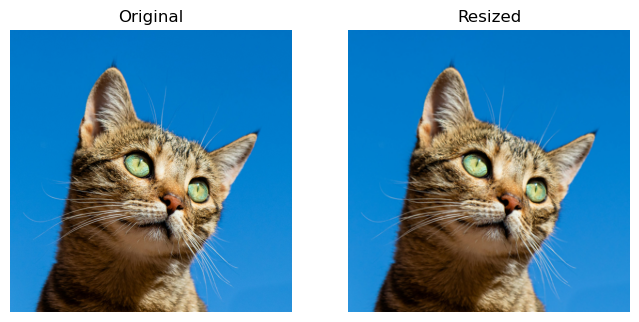

✅ sample.jpg resized and saved as sample.png


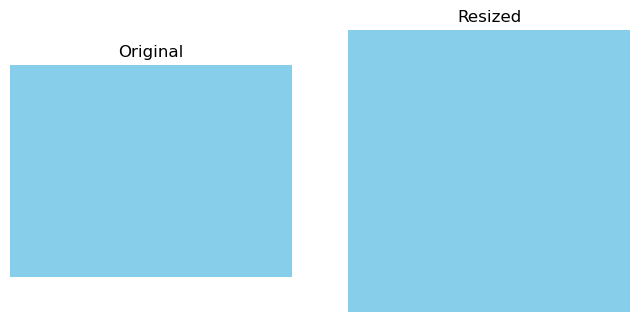

In [5]:
import os
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
input_folder = "input_images"
output_folder = "output_images"
os.makedirs(input_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)
image_urls = [
    "https://images.pexels.com/photos/336172/pexels-photo-336172.jpeg",  
    "https://images.unsplash.com/photo-1574158622682-e40e69881006",      
    "https://upload.wikimedia.org/wikipedia/commons/0/06/Cute_dog.jpg",  
    "https://eastgateanimalhospital.com/.../dog.jpg"                     
]
for idx, url in enumerate(image_urls, start=1):
    try:
        resp = requests.get(url)
        resp.raise_for_status()
        img = Image.open(BytesIO(resp.content))
        img = img.convert("RGB")  # ensure consistent mode
        img.save(os.path.join(input_folder, f"dog{idx}.jpg"))
        print(f"Downloaded dog{idx}.jpg")
    except Exception as e:
        print(f"Failed to download image {url}: {e}")
new_size = (300, 300)
for filename in sorted(os.listdir(input_folder)):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        try:
            img_path = os.path.join(input_folder, filename)
            original = Image.open(img_path)
            resized = original.resize(new_size)
            new_filename = os.path.splitext(filename)[0] + ".png"
            resized.save(os.path.join(output_folder, new_filename))
            print(f" {filename} resized and saved as {new_filename}")

            
            fig, ax = plt.subplots(1, 2, figsize=(8, 4))
            ax[0].imshow(original)
            ax[0].set_title("Original")
            ax[0].axis("off")

            ax[1].imshow(resized)
            ax[1].set_title("Resized")
            ax[1].axis("off")

            plt.show()
        except Exception as e:
            print(f" Error processing {filename}: {e}")
